In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

X_train shape: (180000, 28, 28), Y_train shape: (180000,)
X_test shape: (20000, 28, 28), Y_test shape: (20000,)


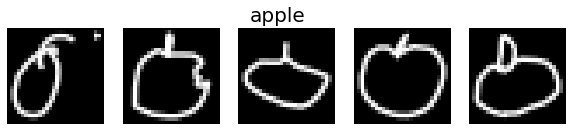

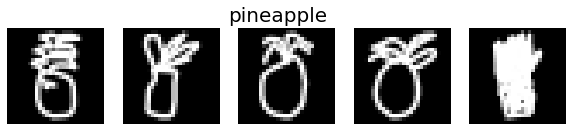

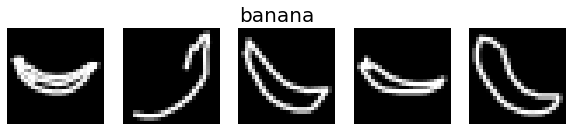

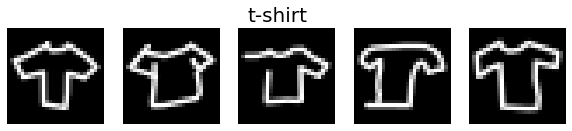

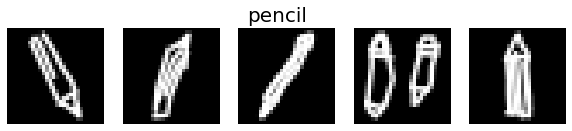

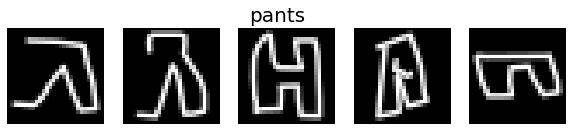

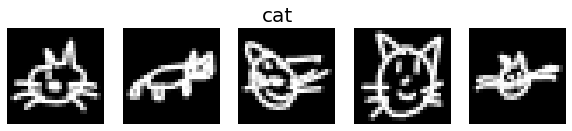

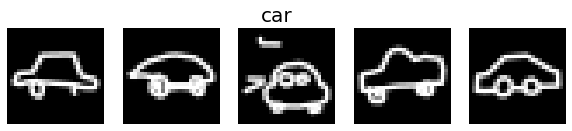

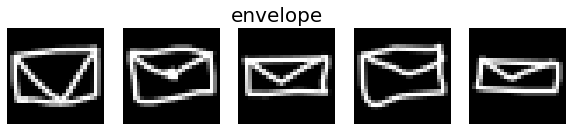

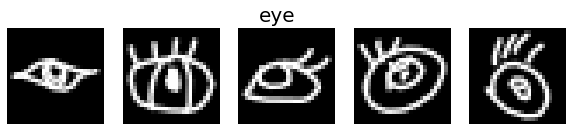

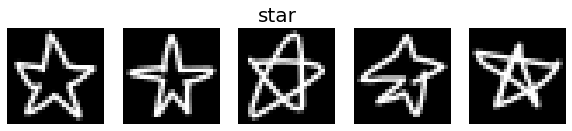

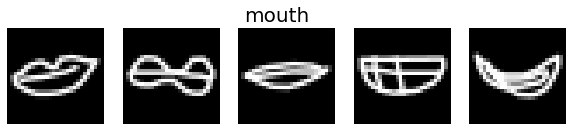

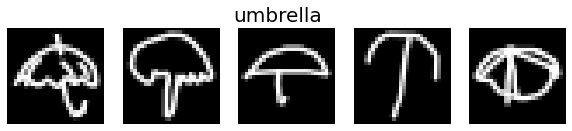

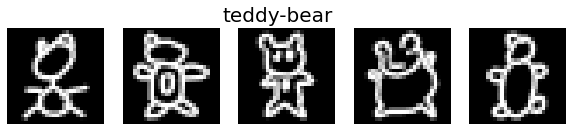

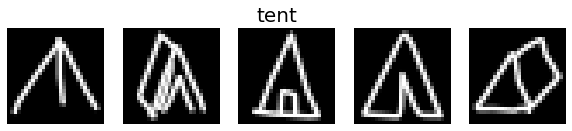

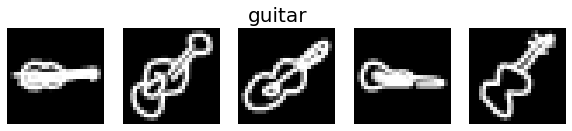

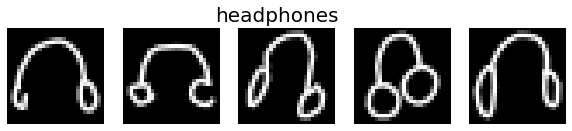

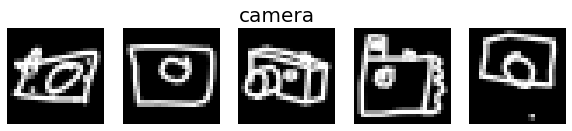

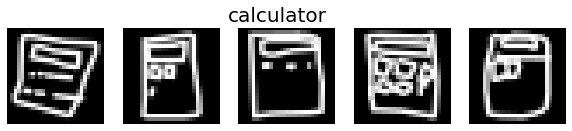

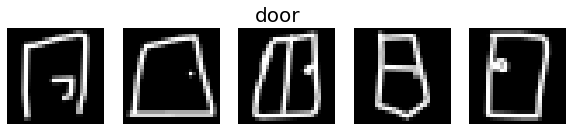

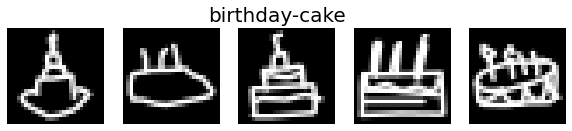

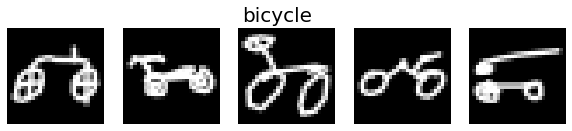

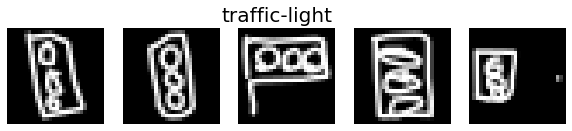

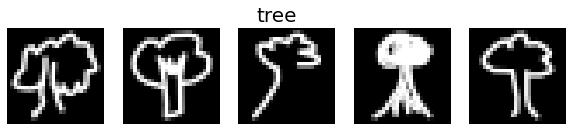

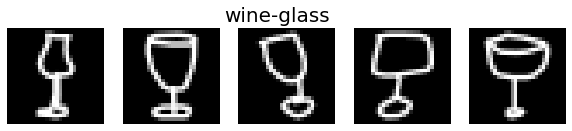

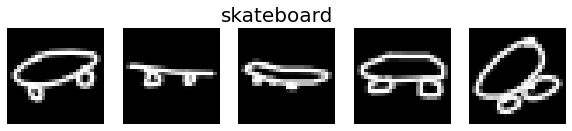

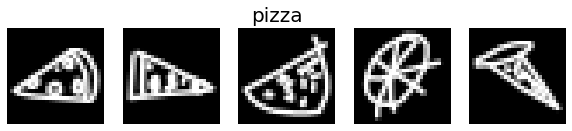

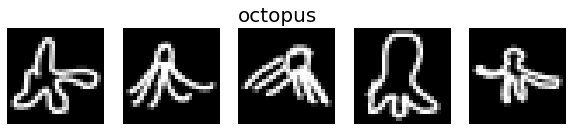

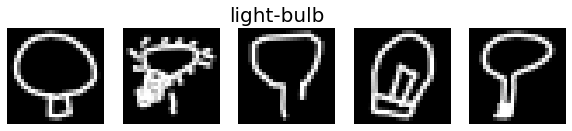

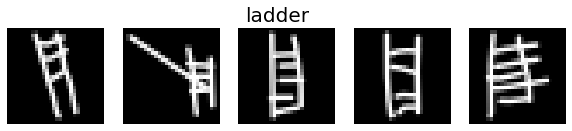

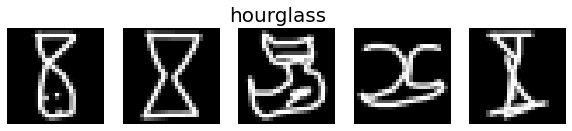

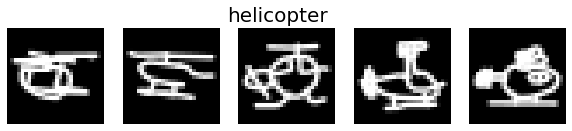

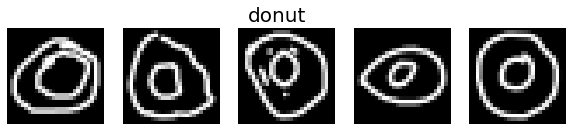

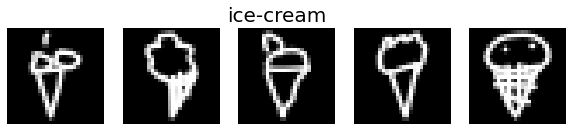

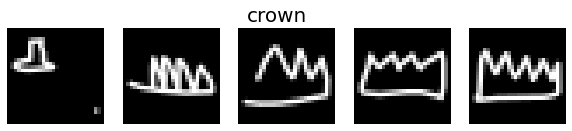

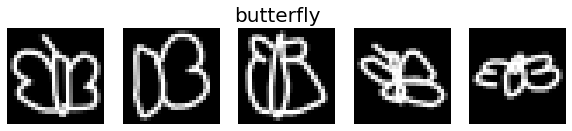

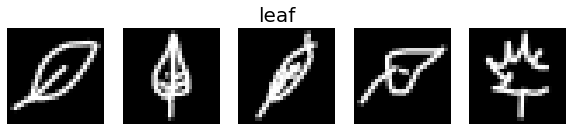

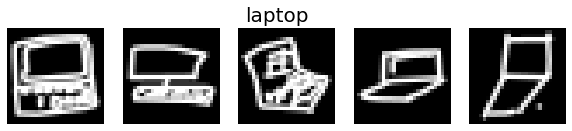

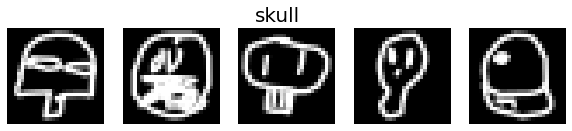

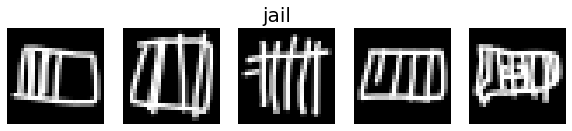

In [2]:
values = ["apple","pineapple","banana","t-shirt","pencil","pants","cat","car","envelope","eye",
          "star","mouth","umbrella","teddy-bear","tent","guitar","headphones","camera","calculator","door",
          "birthday-cake","bicycle","traffic-light","tree","wine-glass","skateboard","pizza","octopus","light-bulb",
          "ladder","hourglass","helicopter","donut","ice-cream","crown","butterfly","leaf","laptop","skull","jail"]

files = ["apple.npy","pineapple.npy","banana.npy","t-shirt.npy","pencil.npy","pants.npy","cat.npy",
         "car.npy","envelope.npy","eye.npy","star.npy","mouth.npy","umbrella.npy","teddy_bear.npy","tent.npy",
         "guitar.npy","headphones.npy","camera.npy","calculator.npy","door.npy","birthday_cake.npy",
         "bicycle.npy","traffic_light.npy","tree.npy","wine_glass.npy","skateboard.npy","pizza.npy","octopus.npy",
         "light_bulb.npy","ladder.npy","hourglass.npy","helicopter.npy","donut.npy","ice_cream.npy","crown.npy",
         "butterfly.npy","leaf.npy","laptop.npy","skull.npy","jail.npy"]
def load(dir, files,max_samples=2000):
    X = []
    Y = []
    for index in range(len(files)):
        f = np.load(dir + files[index])
        for i in range(len(f)):
            x = np.reshape(f[i],(28,28))
            if i==max_samples:
                break
            X.append(x)
            Y.append(index)
    return np.array(X),np.array(Y)

max_samples=5000
X,Y = load("C:\VisheshFiles\OneDrive - Swast Solutions Private Limited\OldProjects\projects\Quick_Draw/data/", files, max_samples)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.9,stratify=Y,random_state=0)
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Print shapes to confirm
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")

for count in range(len(values)):
    plt.figure(figsize=(10,2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X[i+count*max_samples], cmap='gray')
        plt.axis('off')
    plt.suptitle(values[count],fontsize=20)
    plt.show()

In [4]:
model1 = Sequential([
    Conv2D(24, (5, 5), activation='relu', input_shape=(28, 28, 1), padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(32, (5, 5), activation='relu',padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(48, (5, 5), activation='relu',padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(400, activation='relu'),
    Dense(len(values), activation='softmax')
])
X_train_cnn = X_train.reshape((X_train.shape[0],28,28,1))
X_test_cnn = X_test.reshape((X_test.shape[0],28,28,1))
Y_train_cnn = to_categorical(Y_train, len(values))
Y_test_cnn = to_categorical(Y_test, len(values))
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
model2 = Sequential([
    Conv2D(24, (5, 5), activation='relu', input_shape=(28, 28, 1), padding="same"),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    Conv2D(32, (5, 5), activation='relu',padding="same"),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    Conv2D(48, (5, 5), activation='relu',padding="same"),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    Flatten(),
    Dense(400, activation='relu'),
    Dense(len(values), activation='softmax')
])
X_train_cnn = X_train.reshape((X_train.shape[0],28,28,1))
X_test_cnn = X_test.reshape((X_test.shape[0],28,28,1))
Y_train_cnn = to_categorical(Y_train, len(values))
Y_test_cnn = to_categorical(Y_test, len(values))
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Train the model
model2.fit(X_train_cnn, Y_train_cnn, epochs=30, batch_size=512, validation_split=0.2)

Epoch 1/30
282/282 [==============================] - 90s 314ms/step - loss: 2.9251 - accuracy: 0.3260 - val_loss: 1.0194 - val_accuracy: 0.7346
Epoch 2/30
282/282 [==============================] - 88s 313ms/step - loss: 1.0452 - accuracy: 0.7156 - val_loss: 0.6589 - val_accuracy: 0.8294
Epoch 3/30
282/282 [==============================] - 96s 341ms/step - loss: 0.7932 - accuracy: 0.7859 - val_loss: 0.5589 - val_accuracy: 0.8534
Epoch 4/30
282/282 [==============================] - 105s 371ms/step - loss: 0.6694 - accuracy: 0.8205 - val_loss: 0.4791 - val_accuracy: 0.8734
Epoch 5/30
282/282 [==============================] - 107s 381ms/step - loss: 0.5976 - accuracy: 0.8388 - val_loss: 0.4307 - val_accuracy: 0.8859
Epoch 6/30
282/282 [==============================] - 106s 377ms/step - loss: 0.5469 - accuracy: 0.8523 - val_loss: 0.4045 - val_accuracy: 0.8933
Epoch 7/30
282/282 [==============================] - 108s 381ms/step - loss: 0.5076 - accuracy: 0.8630 - val_loss: 0.3843 - va

In [5]:
# model2.save_weights('weights2.h5')

625/625 - 15s - loss: 0.3069 - accuracy: 0.9234 - 15s/epoch - 24ms/step
Test accuracy: 0.9234499931335449
625/625 [==============================] - 18s 28ms/step
CNN Accuracy: 0.92345


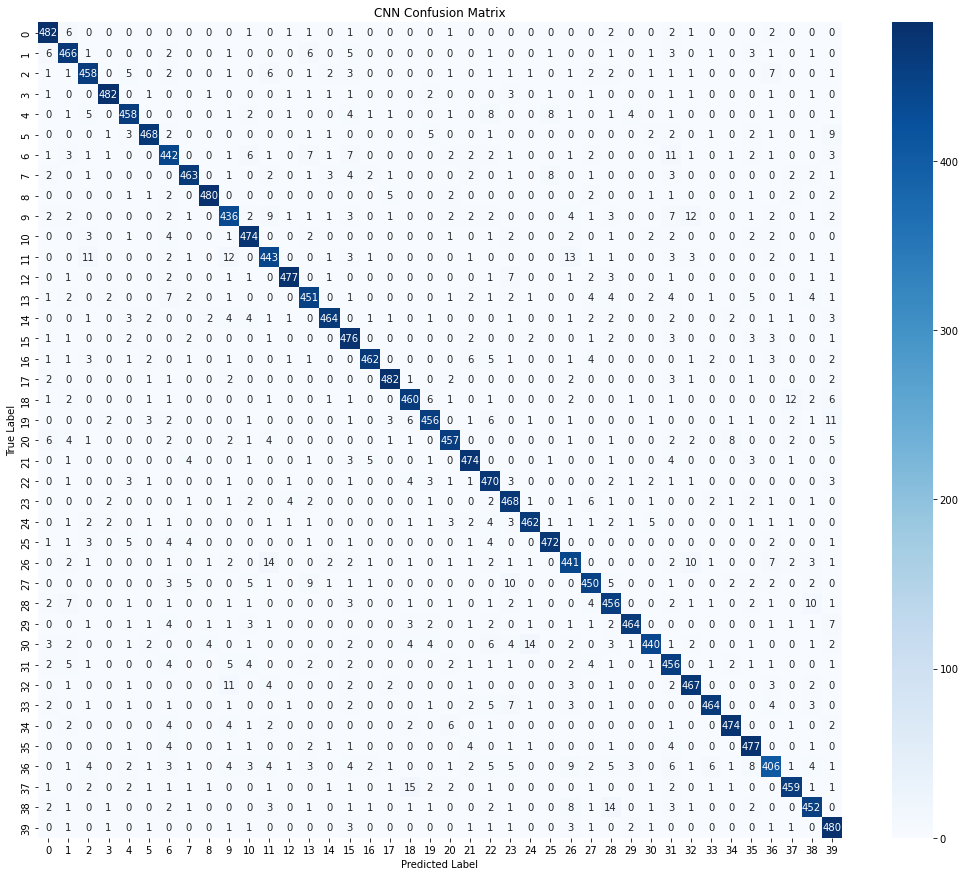

Classwise Accuracy :-
Class apple accuracy = 0.964
Class pineapple accuracy = 0.932
Class banana accuracy = 0.916
Class t-shirt accuracy = 0.964
Class pencil accuracy = 0.916
Class pants accuracy = 0.936
Class cat accuracy = 0.884
Class car accuracy = 0.926
Class envelope accuracy = 0.96
Class eye accuracy = 0.872
Class star accuracy = 0.948
Class mouth accuracy = 0.886
Class umbrella accuracy = 0.954
Class teddy-bear accuracy = 0.902
Class tent accuracy = 0.928
Class guitar accuracy = 0.952
Class headphones accuracy = 0.924
Class camera accuracy = 0.964
Class calculator accuracy = 0.92
Class door accuracy = 0.912
Class birthday-cake accuracy = 0.914
Class bicycle accuracy = 0.948
Class traffic-light accuracy = 0.94
Class tree accuracy = 0.936
Class wine-glass accuracy = 0.924
Class skateboard accuracy = 0.944
Class pizza accuracy = 0.882
Class octopus accuracy = 0.9
Class light-bulb accuracy = 0.912
Class ladder accuracy = 0.928
Class hourglass accuracy = 0.88
Class helicopter accurac

In [5]:
model2 = Sequential([
    Conv2D(24, (5, 5), activation='relu', input_shape=(28, 28, 1), padding="same"),
    MaxPooling2D((2, 2)),
    Dropout(0.15),
    Conv2D(32, (5, 5), activation='relu',padding="same"),
    MaxPooling2D((2, 2)),
    Dropout(0.15),
    Conv2D(48, (5, 5), activation='relu',padding="same"),
    MaxPooling2D((2, 2)),
    Dropout(0.15),
    Flatten(),
    Dense(400, activation='relu'),
    Dense(len(values), activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the weights from the file
model2.load_weights('weights2.h5')

test_loss, test_accuracy = model2.evaluate(X_test_cnn, Y_test_cnn, verbose=2)
print('Test accuracy:', test_accuracy)
Y_pred_cnn = model2.predict(X_test_cnn)
Y_pred_cnn = np.argmax(Y_pred_cnn, axis=1)

# Accuracy and Confusion Matrix for KNN
accuracy_cnn = accuracy_score(Y_test, Y_pred_cnn)
cm_cnn = confusion_matrix(Y_test, Y_pred_cnn)

print(f"CNN Accuracy: {accuracy_cnn}")

# Plot confusion matrix
plt.figure(figsize=(18, 15))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classwise Accuracy
print("Classwise Accuracy :-")
class_acc = cm_cnn.diagonal() / cm_cnn.sum(axis=1)
for i in range(len(class_acc)):
    print("Class",values[i],"accuracy =",class_acc[i])